#  K-Means Clustering - Airline Data

Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 

We'll use k-means and Hierarchical to discover clusters in a data set using unsupervised learning.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

In [2]:
airline = pd.read_csv("EastWestAirlines.csv")

In [3]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
airline.columns =['Passenger_ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']

In [7]:
airline

,Passenger_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
airline.Award.value_counts()

0    2518
1    1481
Name: Award, dtype: int64

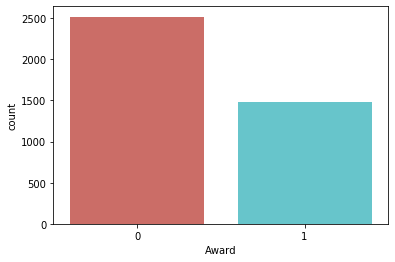

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='Award', data=airline,palette='hls')
plt.show()
plt.savefig('count_fig')

*Finding out the optimal number of clusters*
- We start by using all 11  variables, excluding variable Passenger Id.

In [ ]:
X = airline[[ 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:20]

Next, we choose the optimal number of clusters using the elbow method by plotting the above table:

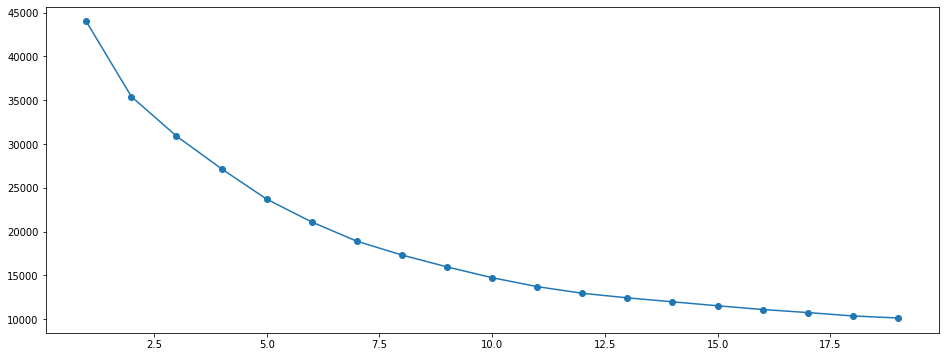

In [11]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

The kinks appear to be smoothening out after four clusters indicating that the optimal number of clusters is 11.
Next, we divide the data into the chosen number of clusters.

In [12]:
X = airline[[ 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']]


clusters = KMeans(11)  # 11clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

airline['Air_clusters'] = clusters.labels_
airline.head()
airline.sort_values(by=['Air_clusters'],ascending = True)
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


***Analysing the data pairwise - Balance & Award***
- We start by looking at the two main variables until digging into separate Award.

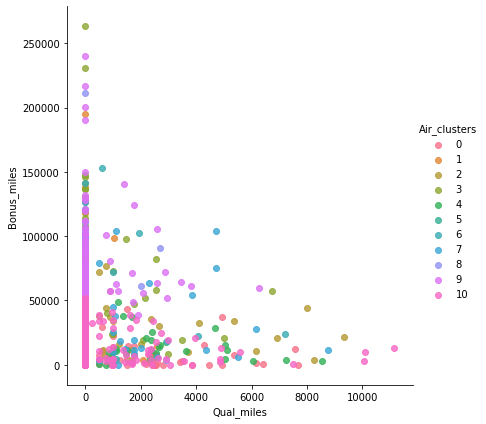

In [13]:
sns.lmplot('Qual_miles', 'Bonus_miles', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );

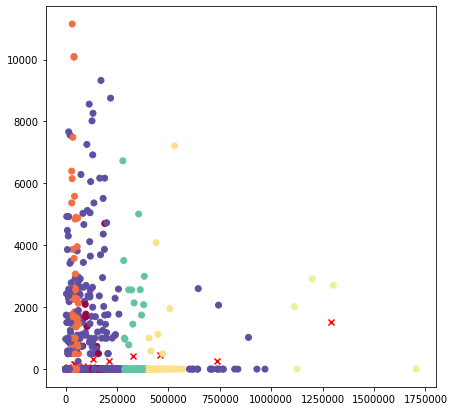

In [14]:
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

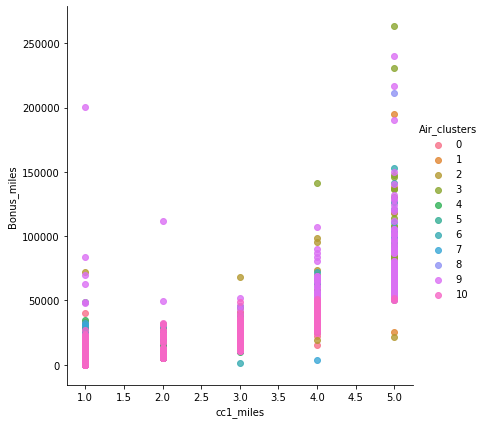

In [15]:
sns.lmplot('cc1_miles', 'Bonus_miles', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );

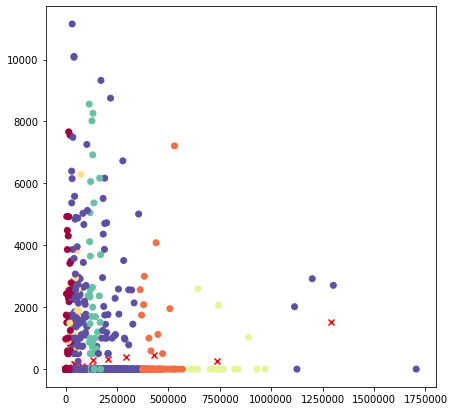

In [16]:
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

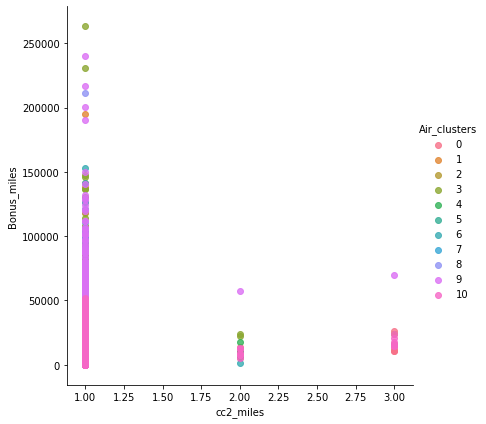

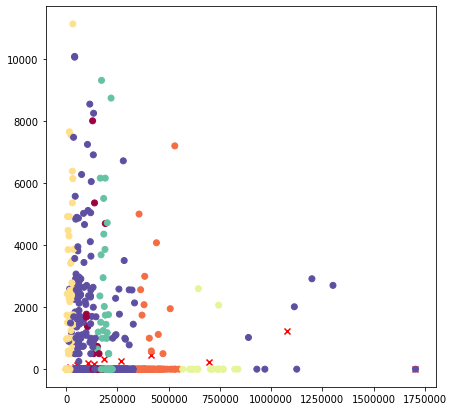

In [17]:
sns.lmplot('cc2_miles', 'Bonus_miles', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 


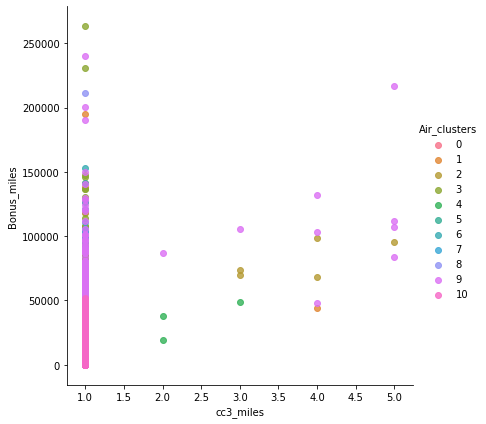

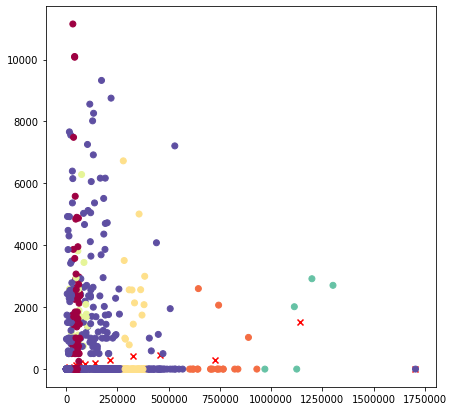

In [18]:
sns.lmplot('cc3_miles', 'Bonus_miles', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

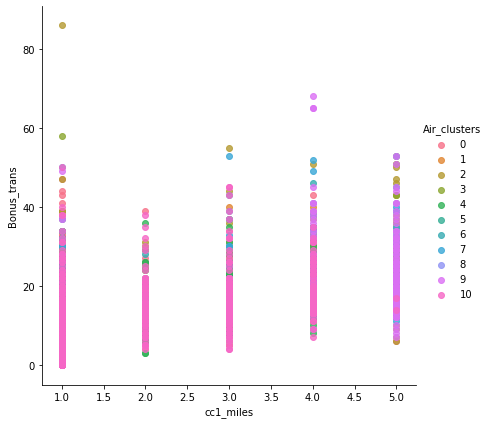

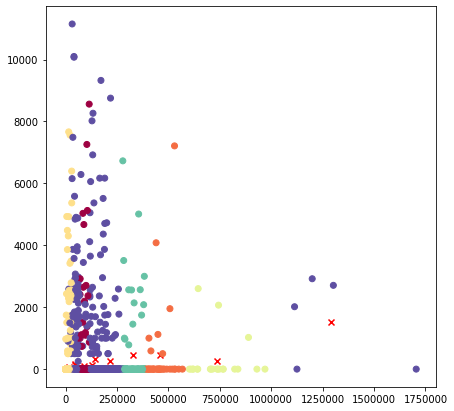

In [19]:
sns.lmplot('cc1_miles', 'Bonus_trans', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

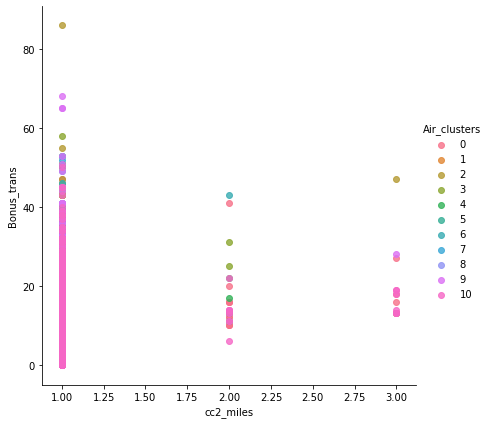

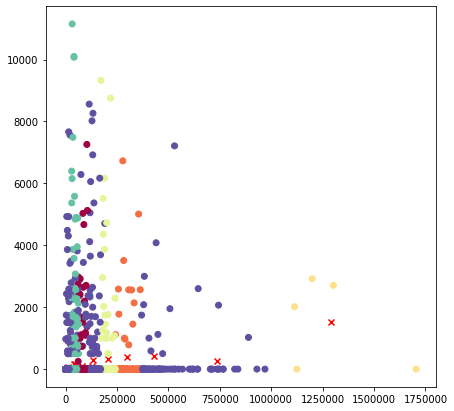

In [20]:
sns.lmplot('cc2_miles', 'Bonus_trans', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

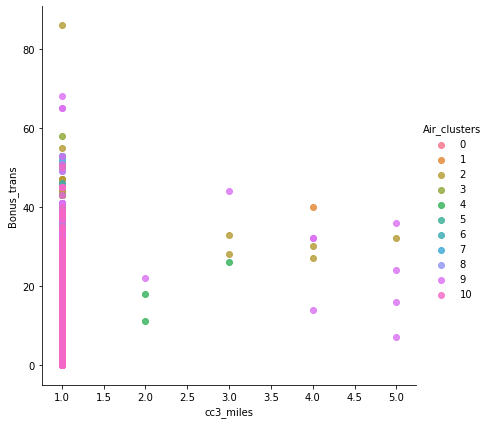

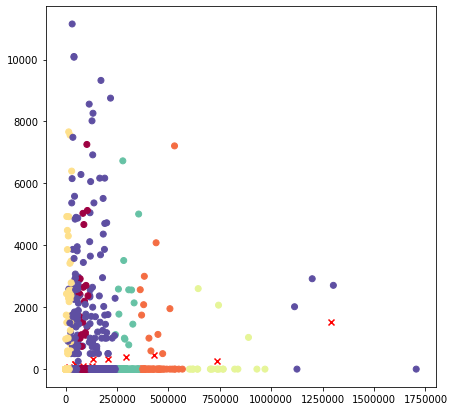

In [21]:
sns.lmplot('cc3_miles', 'Bonus_trans', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

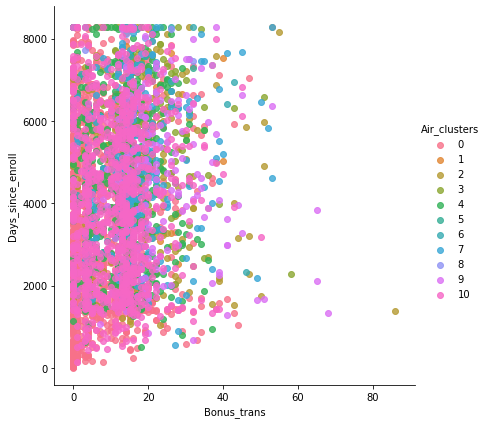

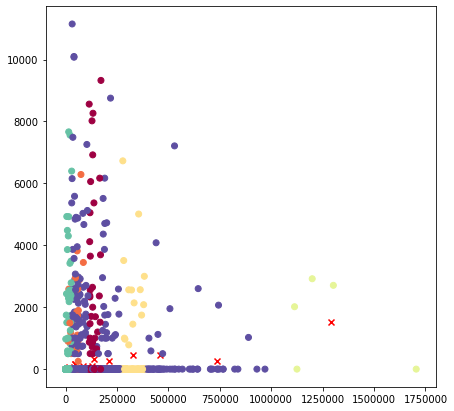

In [22]:
sns.lmplot('Bonus_trans','Days_since_enroll', data=airline,
        hue = "Air_clusters",
        fit_reg=False, height = 6 );
data=X
clusters = KMeans(11);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

# Hierarchical Clustering

- Hierarchical clustering for the same dataset
-  creating a dataset for hierarchical clustering

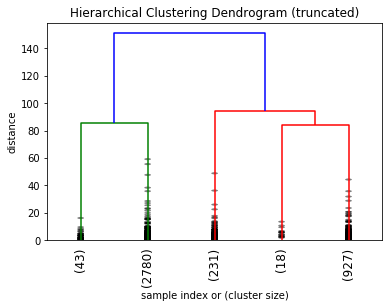

In [41]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(airline)
dataset2_standardized = pd.DataFrame(dataset1_standardized)



#dataset2_standardized = X_scaled # needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline



np.set_printoptions(precision=11 ,suppress=True)  # suppress scientific float notation#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Assigning the clusters and plotting the observations as per hierarchical clustering

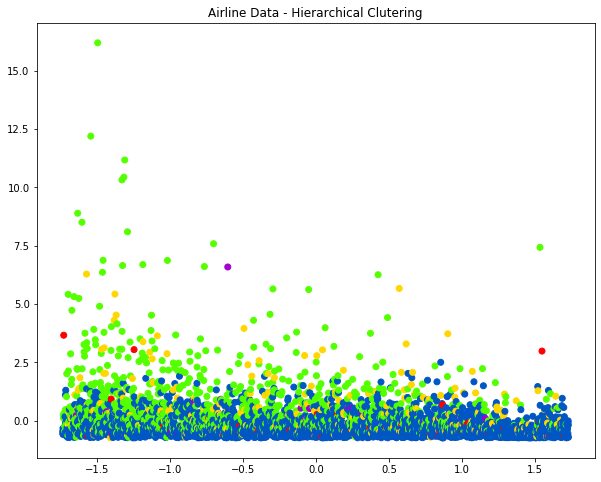

In [42]:
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(dataset2_standardized.iloc[:,0], dataset2_standardized.iloc[:,1],c=cluster_2, cmap='prism') 
# plot points with cluster dependent colors
plt.title('Airline Data - Hierarchical Clutering')
plt.show()

In [43]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)# Adding the hierarchical clustering to dataset
dataset2=airline
dataset2['cluster'] = cluster_Hierarchical
dataset2.head(40)

,Passenger_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Air_clusters,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,10,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,5
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,4,5
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,6,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4,5


# Insights and Plan of Action:

-  Cluster 5 is set of the recently acquired customer group as the Days since enrollment is lowest , moreover their flight    transactions in last 12 months as well as the qualified miles for top class travel is the lowest.
-   Cluster 3 is the set of high vintage customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel
 -   Cluster 4 is also high vintage customers however their number of flight miles and flight transactions in last 12 months is alarmingly low, they may churn unless some intervention is done. Bespoke offers to activate these customers is necessary
 -   Cluster 2 is group of customers who have done highest number of flight transactions and acquired flight miles in last 12 months. Investigate further and identify their needs. For Eg: They may be baby boomers generation who have begun to travel around after their retirement etc.